In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
#plt.rcParams['text.usetex'] = True

from bidimensional import *

# 2D
We consider a 2D system with a magnetic field in the orthogonal axis.
- DISCRETE levels $\epsilon_n = \hbar\omega_c(\frac{1}{2}+n)$
- Density of states $g(\epsilon)$ is made up of equispaced $\delta(\epsilon-\epsilon_n)$
- "Height" of each delta (so the number of states degenerate) is proportional to the field $B$
where $\omega_c=\frac{eB}{m}$ is the cyclotron frequency (m is the electron mass).

## Density of states $g(\epsilon)$
In 2D the calculation of the degeneracy (number of states w/ the same energy) is _trivial_, because energy depends just on the quantum number $n$, so the states w/ the same energy are the ones in the same landau level (which means with the same $n$) \\\
The number of states with the same $n$ comes from PBC along x and y.
For a Square ($L=L_x=L_y$)
$$deg(n) = \frac{L}{\frac{2\pi}{L}\frac{\hbar}{eB}}=\frac{L^2}{\Phi_0}B$$ 
where $\Phi_0 = \frac{h}{eB}$ is the quantum flux.
As we said, in 2D the degeneracy of an energy level is simply the number of states with the same quantum number $n$, so in 2D
$$g(\epsilon)\propto B$$
more precisely the _height of each_ $\delta$ is the same and its proportional to B.

In 3D the calculation of $g(\epsilon)$ is _not trivial_, because energy levels depend on an additionla quantum number $k_z$, so $g(\epsilon)\neq deg(n)$

### Note on DOFs
_Apparently_ the system DOFs are: $B$ and the bidimensional sheet dimensions ($Lx$ and $Ly$, which are the same $L$ for a square sheet).\\\
For simplicity, in this file we _fix L_ and leave $B$ as the only value you can change.\\\
Anyway the physics you can see fixing the sheet size is _the same_ that you see with a variable size, because everytime $L$ shows up in the formula, there is $B$ and every formula depends on those two values only through the flux $\Phi = BL^2$.\\\
So there is _just one DOF_, which is the flux $\Phi$.

Since the magnetic field is not dimensionless, its not a good idea make the user choose it. Otherwise we would have to deal w/ _measure units_!\\\
Instead, we consider a function $B$ that is dimensionless:\\\
$Z=\frac{\Phi}{\Phi_0}=L^2B$ is the _number_ of quantums of flux of $B$ trough the sheet. It is dimensionless.

In the following sections we leave as a variable $Z$ and we do not work directly with Energy levels, but with normalized energy levels that are dimensionless:
$$\epsilon_n \rightarrow \tilde{\epsilon_n} = \epsilon_n \frac{mL^2}{2\pi\hbar^2}=Z(\frac12 + n)$$

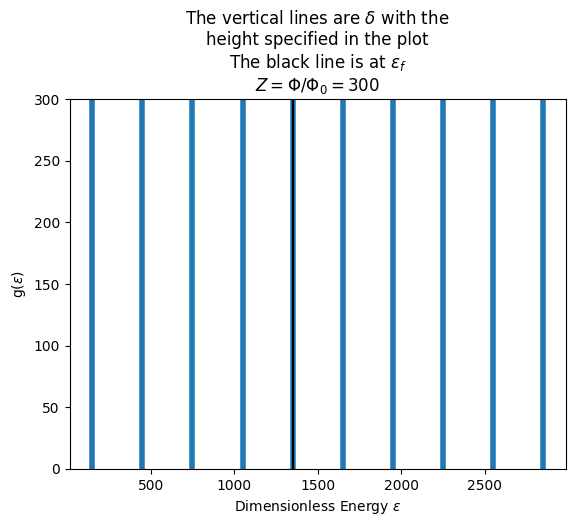

In [3]:
"""Density of state and fermi level"""
N = 1000 # Number of electrons
Z = 300 # Number of quantum fluxes
n_max = 10 # Plot until the n_max-th landau level
fig, ax = plot_fermi_over_density(Z,N,n_max)

## Fermi level position (as a function of B)
We fix the number of electrons $N$ and the $B$ field, then we _fill up from the bottom_ the landau levels.

Text(0.5, 1.0, '$\\epsilon_f$ dependance on B field\n$Z \\propto B$')

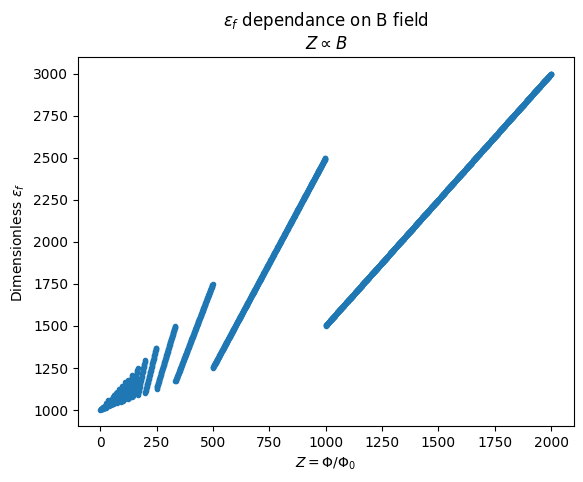

In [4]:
"""Ef dependance on B v.s. landau levels dependance on B"""
N = int(1000)
num_Zs = 2000 # Number of values of Z (so of B) considered
Zs = np.arange(1,num_Zs+1)
i = 0
fermi_energies = np.zeros(num_Zs)
for Z in Zs:
    fermi_energies[i] = fermi_level(Z,N)
    i = i + 1
fig, ax = plt.subplots()
ax.plot(Zs, fermi_energies,'.')
ax.set_ylabel("Dimensionless $\epsilon_f$")
ax.set_xlabel("$Z=\Phi/\Phi_0$")
ax.set_title("$\epsilon_f$ dependance on B field\n$Z \propto B$")

In the plot above, each line represents a landau level, more precisely:\\\
each line describes a span of values of Z for which the fermi level coincides with the landau level associated with the line.\\\
In fact each landau level is _proportional_ (so its a _line_) to B, with a proportionality coefficient that depends on B.

### Important result
The fermi level is _carried_ by a certain landau level, whose energy grows with B (so with Z). During this _synchronized movement_ the height of the $\delta$ increases.\\\
After a critical $B_n$ field (which depends on the index $n$ of the landau level $\epsilon_n$) the height of the $\delta$ (that is the degeneracy of the levels) becomes so big that the _previous_ landau levels become _sufficiently degenerate_ to host all the electrons; so the fermi level _jumps_ to the lower landau level.

Following those considerations, for a very strong $B$ field the only occupied level is the first one ($n=0$).\\\
Since there are no levels below, increasing the $B$ field the fermi level is simply carried by the ground state (which grows, because its proportional to $B$) and _never jumps anymore_!!!\\\
So, for a very high $B$ field, the fermi level just drift, but as soon as $B$ is low enought that the degeneracy of the landau levels is low enough that more than one level is (at least partially) occupied, then if you start to increase $B$, you will see at least one jump of the fermi level and not just a drift).

The drift velocity changes after a jump, because after a jump the fermi level begins to be carried by another landau leveles and the proportionality factor (to B) of a landau level depends on the level index $n$ (see above). 

In [9]:
"""ANIMATION of the behaviour described above"""
N = int(1000)
Zs = np.arange(200,300)
num_Zs = len(Zs) # Number of values of Z (so of B) considered
i = 0
fermi_energies = np.zeros(num_Zs)
for Z in Zs:
    fig, ax = plot_fermi_over_density(Z,N,n_max)
    ax.set_xlim(0,landau2D(Zs[len(Zs)-1],n_max))
    if not os.path.exists("gif"):
        os.makedirs("gif")
    fig.savefig("gif/"+str(Z)+'.png')
    plt.close(fig)


"""Create animation"""
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("gif/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('animation.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=10, loop=0)

Passing from Z=249 to Z=250 you can see the fermi level jumping.\\\
Note that the maximum value on the y axis increases with Z (so with B), because the degeneracy of landau levels grows as the field grows; this is the reason for the jumps.